In [20]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset
DATA_PATH = "../data/raw/data.csv"
df = pd.read_csv(DATA_PATH)

In [22]:
# 1. Overview of the Data
print("\n🔹 Data Shape:", df.shape)
df.head()

# 2. Summary Statistics
print("\n🔹 Summary Statistics:")
df.describe()


🔹 Data Shape: (95662, 16)

🔹 Summary Statistics:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [23]:
# 3. Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))

# 4. Data Types and Unique Values
print("\n🔹 Data Types:")
print(df.dtypes)
print("\n🔹 Unique Values:")
print(df.nunique().sort_values())


🔹 Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

🔹 Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

🔹 Unique V


🔹 Numerical Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


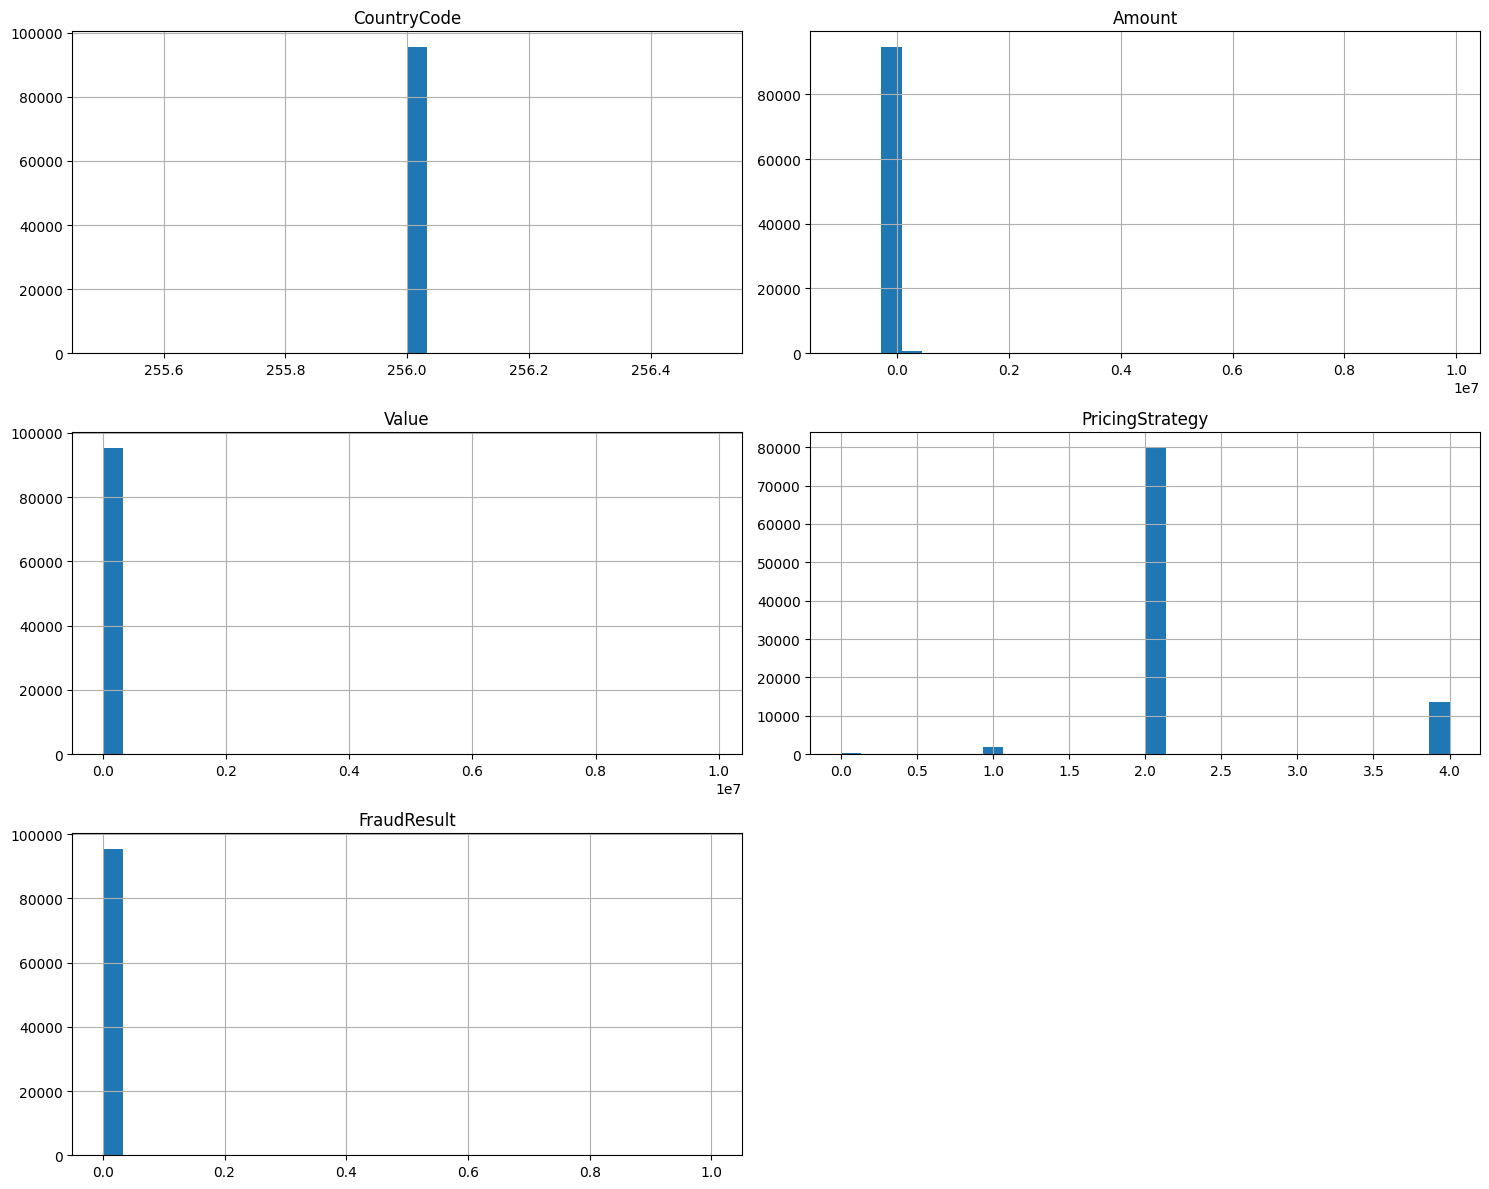

In [24]:
# 5. Distribution of Numerical Features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n🔹 Numerical Features:", list(num_cols))
df[num_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [25]:
# 6. Distribution of Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns
print("\n🔹 Categorical Features:", list(cat_cols))
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True).head())


🔹 Categorical Features: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

Value counts for TransactionId:
TransactionId
TransactionId_76871    0.00001
TransactionId_73770    0.00001
TransactionId_26203    0.00001
TransactionId_380      0.00001
TransactionId_28195    0.00001
Name: proportion, dtype: float64

Value counts for BatchId:
BatchId
BatchId_67019     0.000293
BatchId_51870     0.000167
BatchId_113893    0.000146
BatchId_127204    0.000125
BatchId_116835    0.000105
Name: proportion, dtype: float64

Value counts for AccountId:
AccountId
AccountId_4841    0.322939
AccountId_4249    0.046591
AccountId_4840    0.018168
AccountId_3206    0.011551
AccountId_318     0.011185
Name: proportion, dtype: float64

Value counts for SubscriptionId:
SubscriptionId
SubscriptionId_3829    0.341097
SubscriptionId_4429    0.046591
SubscriptionId_1372    0.011551
Subscription

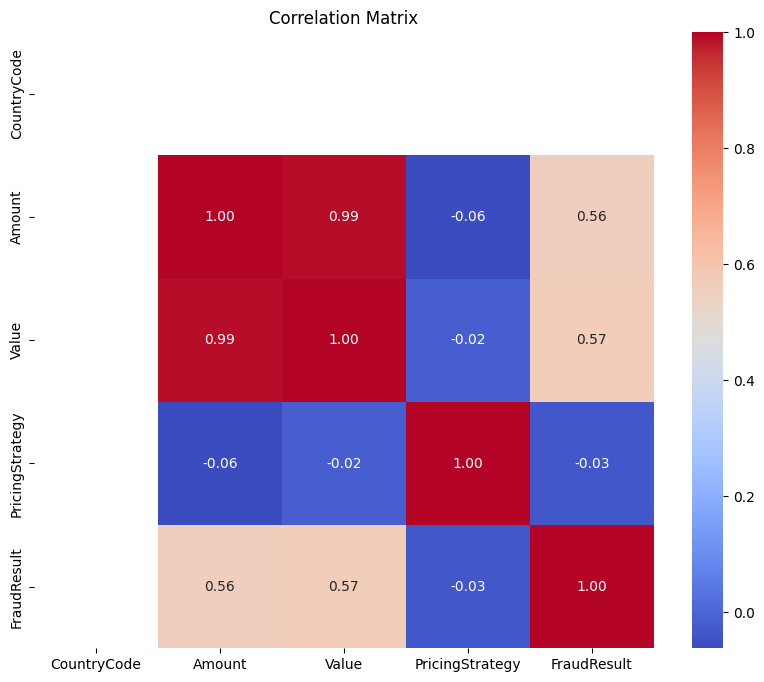

In [26]:
# 7. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

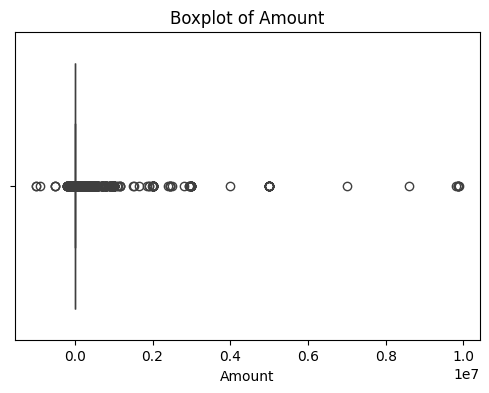

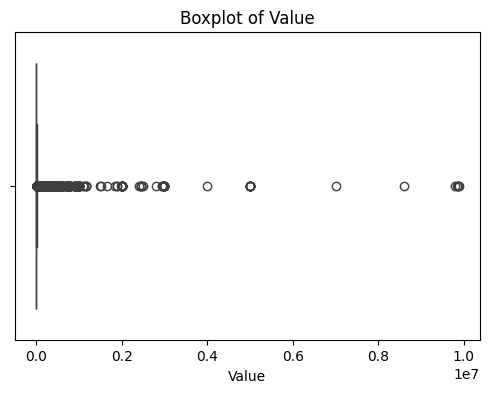

In [27]:
# 8. Boxplot for Outliers
for col in ['Amount', 'Value']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot of {col}")
        plt.show()

In [28]:
# 9. Timestamp Features
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDay'] = df['TransactionStartTime'].dt.day
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    df['TransactionYear'] = df['TransactionStartTime'].dt.year
    print("\n🔹 Timestamp features extracted.")
    print(df[['TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head())


🔹 Timestamp features extracted.
   TransactionHour  TransactionDay  TransactionMonth  TransactionYear
0                2              15                11             2018
1                2              15                11             2018
2                2              15                11             2018
3                3              15                11             2018
4                3              15                11             2018


In [29]:
#save the data to processed folder
PROCESSED_DATA_PATH = "../data/processed/eda_data.csv"
df.to_csv(PROCESSED_DATA_PATH, index=False)